# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [162]:
import matplotlib.pyplot as plt
import requests
import json
from scipy import stats
import pandas as pd
from api_keys import weather_api_key
from api_keys import g_key
from citipy import citipy
from pprint import pprint
import numpy as np


long = np.random.uniform(-180, 180, 1500)
lat = np.random.uniform(-90,90,1500)

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
api_key = weather_api_key

query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [163]:

long_lat = zip(lat, long)
cities = []
countries=[]
for i in long_lat:
    city = citipy.nearest_city(i[0], i[1]).city_name
    cities.append(city)
    country = citipy.nearest_city(i[0], i[1]).country_code
    countries.append(country)
df = pd.DataFrame({'City': cities,
                  'Country': countries})
df_clean = df.drop_duplicates(subset=["City"])
df_clean = df_clean.reset_index(drop = True)
clean_cities = []
for i in cities:
    if i not in clean_cities:
        clean_cities.append(i)
        

df_clean['City'].count()


600

'http://api.openweathermap.org/data/2.5/weather?appid=539fbd3c4b07ebc47829760747973778&units=metric&q=belgrade'


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [164]:
temperature = []
humidity = []
cloudiness = []
wind = []
longitude = []
latitude = []
date = []
for city in clean_cities:
    

    try:
        response = requests.get(query_url + city).json()
        longitude.append(response['coord']['lon'])
        latitude.append(response['coord']['lat'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        print(f'Processing Record | {city}')
          
    except:
        print(f'{city} not found')
        longitude.append(np.nan)
        latitude.append(np.nan)
        temperature.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind.append(np.nan)
        date.append(np.nan)
        
        pass
    



Processing Record | ous
mentok not found
Processing Record | punta arenas
Processing Record | mataura
Processing Record | longyearbyen
Processing Record | ushuaia
Processing Record | vao
amderma not found
Processing Record | albany
Processing Record | victoria
Processing Record | kruisfontein
Processing Record | saldanha
Processing Record | avarua
tsihombe not found
Processing Record | faanui
Processing Record | namatanai
Processing Record | deer lake
Processing Record | subate
Processing Record | yar-sale
Processing Record | tucurui
Processing Record | busselton
Processing Record | arraial do cabo
Processing Record | roebourne
Processing Record | tuktoyaktuk
Processing Record | tuatapere
Processing Record | barrow
Processing Record | nikolskoye
barentsburg not found
Processing Record | havelock
Processing Record | kahului
Processing Record | yoichi
Processing Record | port blair
Processing Record | eyl
Processing Record | marienburg
Processing Record | mount gambier
Processing Record 

In [165]:
df_clean['Latitude'] = latitude
df_clean['Longitude'] = longitude
df_clean['Max Temperature'] = temperature
df_clean['Humidity'] = humidity
df_clean['Cloudiness'] = cloudiness
df_clean['Wind Speed'] = wind
df_clean['Date'] = date

df_clean = df_clean.dropna()
df_final = df_clean.reset_index(drop=True)
df_final

# print(len(latitude))
# print(len(longitude))
# print(len(humidity))
# print(df_clean['City'].count())

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,ous,ru,60.9058,61.5186,14.98,70.0,36.0,1.82,1.626900e+09
1,punta arenas,cl,-53.1500,-70.9167,5.06,81.0,90.0,6.69,1.626900e+09
2,mataura,pf,-46.1927,168.8643,6.93,97.0,100.0,1.47,1.626900e+09
3,longyearbyen,sj,78.2186,15.6401,5.91,65.0,20.0,6.69,1.626900e+09
4,ushuaia,ar,-54.8000,-68.3000,0.81,80.0,75.0,2.06,1.626900e+09
...,...,...,...,...,...,...,...,...,...
545,cobija,bo,-11.0267,-68.7692,29.10,48.0,0.0,3.09,1.626900e+09
546,northam,au,51.0333,-4.2167,22.89,76.0,36.0,1.25,1.626900e+09
547,elizabeth city,us,36.2946,-76.2511,34.03,62.0,20.0,2.24,1.626900e+09
548,cao bang,vn,22.6667,106.2500,24.04,96.0,100.0,0.99,1.626900e+09


In [137]:
df_final.dtypes

City                object
Country             object
Latitude           float64
Longitude          float64
Max Temperature    float64
Humidity           float64
Cloudiness         float64
Wind Speed         float64
Date               float64
dtype: object

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [166]:
df_final.to_csv('/Users/novakradovic/Git/python_api_challenge/output/city_data.csv')

In [167]:
df_final.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,21.030683,17.004678,20.886618,70.567273,54.000000,3.512891,1.626900e+09
std,33.341491,89.514083,7.983720,20.665477,39.170544,2.613752,2.116053e+02
min,-54.800000,-179.166700,0.810000,8.000000,0.000000,0.000000,1.626900e+09
25%,-6.645850,-64.446850,14.292500,62.000000,15.000000,1.545000,1.626900e+09
50%,27.095350,22.250500,22.000000,76.000000,59.500000,2.820000,1.626900e+09
75%,49.266525,91.681900,26.167500,86.000000,97.000000,4.805000,1.626900e+09
max,78.218600,179.316700,40.260000,100.000000,100.000000,20.050000,1.626900e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#maximum humidity is at 100% so there is not outliers with humidity larger then 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [190]:
import datetime
from datetime import date
timestamp = date.fromtimestamp(1.626900e+09)
today = date.today()
#today = print(today)
timestamp

datetime.date(2021, 7, 21)

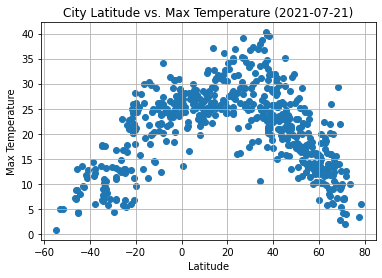

In [199]:
x_axis = df_final['Latitude']
y_axis = df_final['Max Temperature']
plt.scatter(x_axis, y_axis)
plt.title(f'City Latitude vs. Max Temperature ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

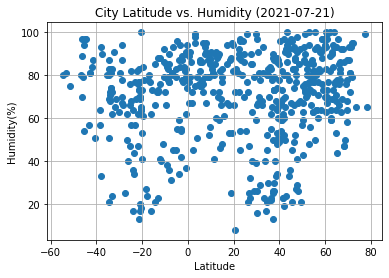

In [188]:

x_axis = df_final['Latitude']
y_axis_1 = df_final['Humidity']
plt.scatter(x_axis, y_axis_1)
plt.title(f'City Latitude vs. Humidity ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

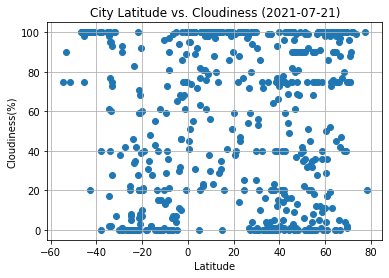

In [189]:
x_axis = df_final['Latitude']
y_axis_2 = df_final['Cloudiness']
plt.scatter(x_axis, y_axis_2)
plt.title(f'City Latitude vs. Cloudiness ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

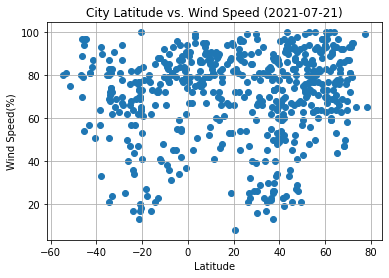

In [191]:
x_axis = df_final['Latitude']
y_axis_3 = df_final['Wind Speed']
plt.scatter(x_axis, y_axis_1)
plt.title(f'City Latitude vs. Wind Speed ({timestamp})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(%)')
plt.grid()
plt.show()

## Linear Regression

In [181]:
north_hem = df_final.loc[df_final['Latitude']>=0, :]
south_hem = df_final.loc[df_final['Latitude']<=0, :]


,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
1,punta arenas,cl,-53.1500,-70.9167,5.06,81.0,90.0,6.69,1.626900e+09
2,mataura,pf,-46.1927,168.8643,6.93,97.0,100.0,1.47,1.626900e+09
4,ushuaia,ar,-54.8000,-68.3000,0.81,80.0,75.0,2.06,1.626900e+09
5,vao,nc,-22.6667,167.4833,21.41,69.0,42.0,5.93,1.626900e+09
8,kruisfontein,za,-34.0033,24.7314,7.16,71.0,95.0,13.26,1.626900e+09
...,...,...,...,...,...,...,...,...,...
525,maryborough,au,-25.5333,152.7000,5.76,76.0,20.0,1.27,1.626900e+09
539,byron bay,au,-28.6500,153.6167,10.97,67.0,0.0,4.57,1.626900e+09
542,oranjemund,na,-28.5500,16.4333,11.34,66.0,0.0,4.87,1.626900e+09
545,cobija,bo,-11.0267,-68.7692,29.10,48.0,0.0,3.09,1.626900e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

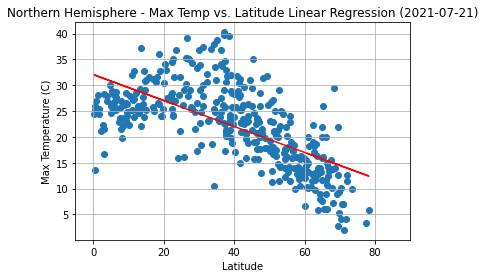

The r-value is: -0.6480737514143308


In [195]:
from scipy.stats import linregress

x_axis_1 = north_hem['Latitude']
y_axis_1 = north_hem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_1, y_axis_1)
regress_values = x_axis_1 * slope + intercept

plt.scatter(x_axis_1, y_axis_1)
plt.plot(x_axis_1, regress_values,"r-")
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-5, 90)
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.show()
print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

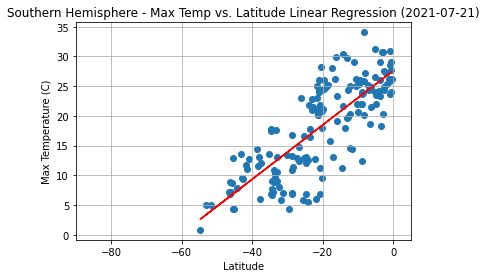

The r-valuse is: 0.7947914073091205


In [197]:
x_axis_2 = south_hem['Latitude']
y_axis_2 = south_hem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_2, y_axis_2)
regress_values = x_axis_2 * slope + intercept

plt.scatter(x_axis_2, y_axis_2)
plt.plot(x_axis_2, regress_values,"r-")
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-90, 5)
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.show()
print(f'The r-valuse is: {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

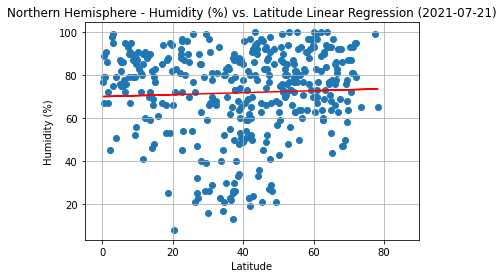

The r-valuse is: 0.044173333402149344


In [198]:
x_axis_1 = north_hem['Latitude']
y_axis_3 = north_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_1, y_axis_3)
regress_values = x_axis_1 * slope + intercept

plt.scatter(x_axis_1, y_axis_3)
plt.plot(x_axis_1, regress_values,"r-")
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-5, 90)
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
print(f'The r-valuse is: {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

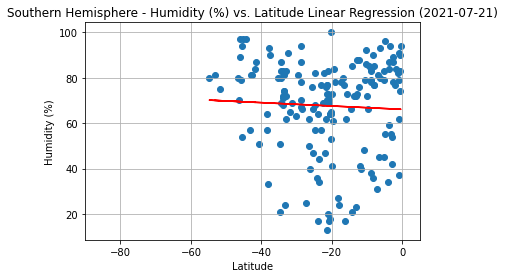

The r-valuse is: -0.04838310186535715


In [200]:
x_axis_2 = south_hem['Latitude']
y_axis_4 = south_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_2, y_axis_4)
regress_values = x_axis_2 * slope + intercept

plt.scatter(x_axis_2, y_axis_4)
plt.plot(x_axis_2, regress_values,"r-")
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-90, 5)
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
print(f'The r-valuse is: {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

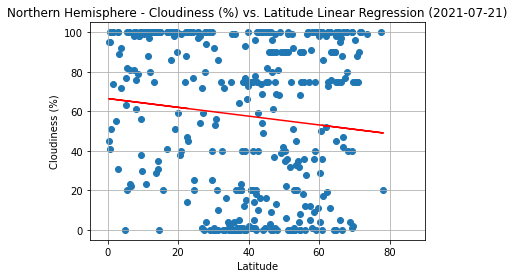

The r-valuse is: -0.11421366138832634


In [201]:
x_axis_1 = north_hem['Latitude']
y_axis_5 = north_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_1, y_axis_5)
regress_values = x_axis_1 * slope + intercept

plt.scatter(x_axis_1, y_axis_5)
plt.plot(x_axis_1, regress_values,"r-")
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-5, 90)
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
print(f'The r-valuse is: {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

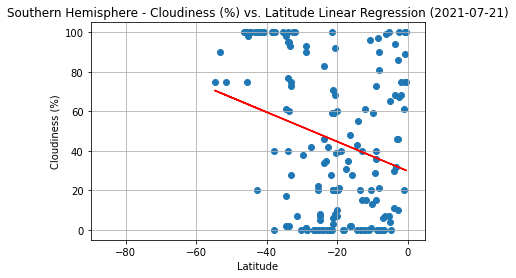

The r-valuse is: -0.26150845550593366


In [202]:
x_axis_2 = south_hem['Latitude']
y_axis_6 = south_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_2, y_axis_6)
regress_values = x_axis_2 * slope + intercept

plt.scatter(x_axis_2, y_axis_6)
plt.plot(x_axis_2, regress_values,"r-")
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-90, 5)
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
print(f'The r-valuse is: {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

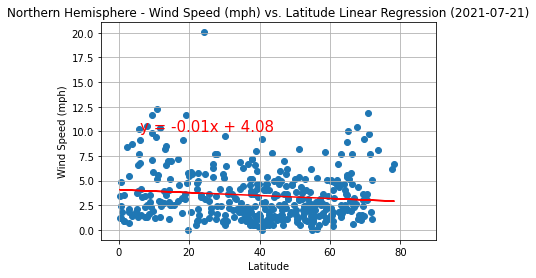

The r-valuse is: -0.11346782654650579


In [203]:
x_axis_1 = north_hem['Latitude']
y_axis_7 = north_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_1, y_axis_7)
regress_values = x_axis_1 * slope + intercept

plt.scatter(x_axis_1, y_axis_7)
plt.plot(x_axis_1, regress_values,"r-")
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-5, 90)
plt.ylabel('Wind Speed (mph)')
plt.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()
print(f'The r-valuse is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

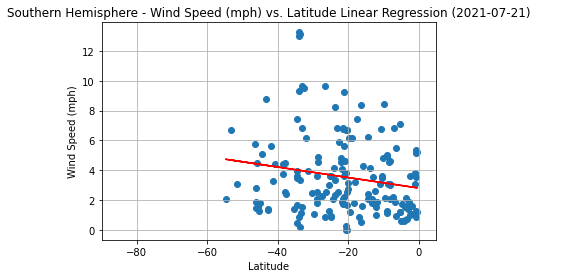

The r-valuse is: -0.18189839589669066


In [204]:
x_axis_2 = south_hem['Latitude']
y_axis_8 = south_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_2, y_axis_8)
regress_values = x_axis_2 * slope + intercept

plt.scatter(x_axis_2, y_axis_8)
plt.plot(x_axis_2, regress_values,"r-")
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({timestamp})')
plt.xlabel('Latitude')
plt.xlim(-90, 5)
plt.ylabel('Wind Speed (mph)')
plt.grid()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()
print(f'The r-valuse is: {rvalue}')